# Communication Exp. Lab3 source code 

## B09901142 EE3 呂睿超

In [1]:
#import needed module
import qiskit
from qiskit import *
import math
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_vector,plot_bloch_multivector

## Q1

### 1.a

In [35]:
#circuit 1
n = 4
#generate all binary inputs
all_pos = []
for i in range(2**n):
    temp = i
    temp = bin(temp)
    temp = temp[2:]
    while(len(temp)<n):
        temp = '0' + temp
    all_pos.append(temp)

truth_table = []
for pos in all_pos:
    circuit = QuantumCircuit(5,1)
    for j in range(len(pos)):
        if pos[j] == '1':
            circuit.x(j)
    for i in range(n):
        circuit.i(i)
    circuit.measure(4,0)
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circuit, simulator, shots = 1024)
    result = job.result()
    counts = result.get_counts()
    for key, value in counts.items():
        res = key
    truth_table.append(res)
print(truth_table)
print(truth_table.count('0'))
print(truth_table.count('1'))

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
16
0


In [37]:
#circuit 2
truth_table = []
for pos in all_pos:
    circuit2 = QuantumCircuit(5,1)
    for j in range(len(pos)):
        if pos[j] == '1':
            circuit2.x(j)
    for i in range(n):
        circuit2.i(i)
    circuit2.x(4)
    circuit2.measure(4,0)
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circuit2, simulator, shots = 1024)
    result = job.result()
    counts = result.get_counts()
    for key, value in counts.items():
        res = key
    truth_table.append(res)
print(truth_table)
print(truth_table.count('0'))
print(truth_table.count('1'))

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
0
16


In [40]:
#circuit 3
truth_table = []
for pos in all_pos:
    circuit3 = QuantumCircuit(5,1)
    for j in range(len(pos)):
        if pos[j] == '1':
            circuit3.x(j)
    for i in range(n):
        circuit3.cnot(i,4)
    circuit3.measure(4,0)
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circuit3, simulator, shots = 1024)
    result = job.result()
    counts = result.get_counts()
    for key, value in counts.items():
        res = key
    truth_table.append(res)
print(truth_table)
print(truth_table.count('0'))
print(truth_table.count('1'))

['0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0']
8
8


### 1.b

In [24]:
# from 1.a generalize oracle circuit
def oracle_circuit(case,n):
    oracle_ckt = QuantumCircuit(n+1)
    if case == 'const':
        for i in range(n):
            oracle_ckt.i(i)
        output = np.random.randint(2)
        if output == 1:
            oracle_ckt.x(n)
    elif case == 'balanced':
        query_x = np.random.randint(2**n)
        query_x = bin(query_x)
        query_x = query_x[2:]
        while(len(query_x)<n):
            query_x = '0' + query_x
        for j in range(len(query_x)):
            if query_x[j] == '1':
                oracle_ckt.x(j)
        for i in range(n):
            oracle_ckt.cnot(i,n)
        for j in range(len(query_x)):
            if query_x[j] == '1':
                oracle_ckt.x(j)  
    else:
        print('Error')
    return oracle_ckt

In [25]:
#def dj_algorithm
def dj_algorithm(oracle,n):
    dj_circuit = QuantumCircuit(n+1,n)
    # superposition state
    for i in range(n):
        dj_circuit.h(i)
    # y bit
    dj_circuit.x(n)
    dj_circuit.h(n)
    # oracle query
    dj_circuit.append(oracle,range(n+1))
    
    for i in range(n):
        dj_circuit.h(i)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

{'0000': 1024}


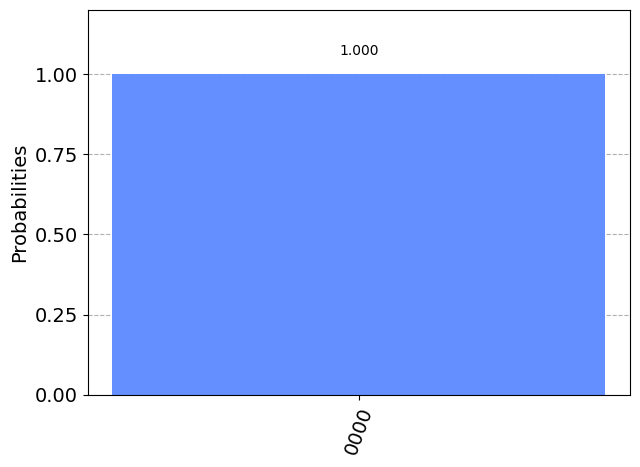

In [26]:
#test
n = 4

#case 1
oracle_ckt = oracle_circuit('const', n)
dj_circuit = dj_algorithm(oracle_ckt, n)
simulator = Aer.get_backend('qasm_simulator')
job = execute(dj_circuit, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [200]:
#case 2
oracle_ckt = oracle_circuit('balanced', n)
dj_circuit = dj_algorithm(oracle_ckt, n)
simulator = Aer.get_backend('qasm_simulator')
job = execute(dj_circuit, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'1111': 1024}


In [202]:
dj_circuit.draw()

┌───┐     ┌────────────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0               ├┤ H ├┤M├─────────
     ├───┤     │                │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1               ├┤ H ├─╫─┤M├──────
     ├───┤     │                │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 circuit-68459 ├┤ H ├─╫──╫─┤M├───
     ├───┤     │                │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3               ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│                │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4               ├──────╫──╫──╫──╫─
     └───┘└───┘└────────────────┘      ║  ║  ║  ║ 
c: 4/══════════════════════════════════╩══╩══╩══╩═
                                       0  1  2  3

In [203]:
oracle_ckt = oracle_circuit('balanced', n)
dj_circuit = dj_algorithm(oracle_ckt, n)
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 1024

# Load local account information
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
# Run our circuit
t_qc = transpile(dj_circuit, backend, optimization_level=3)
job = backend.run(t_qc)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()
plot_histogram(result.get_counts(dj_circuit))

least busy backend:  ibmq_belem
Job Status: job is queued (37)    

KeyboardInterrupt: 

## Q2

In [315]:
test = QuantumCircuit(3)
test.x(1)
test.x(2)
simulator = Aer.get_backend('statevector_simulator')
job = execute(test, simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)
array_to_latex(statevector, prefix="\\text{Statevector} = ")

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

### 2.a

In [304]:
from qiskit.quantum_info import partial_trace
#bitflip oracle
bitfilp_oracle = QuantumCircuit(4)
#random state generation
for i in range(3):
    bitfilp_oracle.h(i)
    
#minus state
bitfilp_oracle.x(3)
bitfilp_oracle.h(3)


bitfilp_oracle.x(0)

bitfilp_oracle.mct(list(range(3)),3)
bitfilp_oracle.x(0)

bitfilp_oracle.h(3)
bitfilp_oracle.x(3)
bitfilp_oracle.draw()
simulator = Aer.get_backend('statevector_simulator')
job = execute(bitfilp_oracle, simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)
array_to_latex(statevector, prefix="\\text{Statevector} = ",max_size=16)



Statevector([ 3.53553391e-01+2.16489014e-17j,
              3.53553391e-01+2.16489014e-17j,
              3.53553391e-01+2.16489014e-17j,
              3.53553391e-01+2.16489014e-17j,
              3.53553391e-01+2.16489014e-17j,
              3.53553391e-01+2.16489014e-17j,
             -3.53553391e-01-2.16489014e-17j,
              3.53553391e-01+2.16489014e-17j,
              0.00000000e+00-2.16489014e-17j,
             -3.92523115e-17-2.16489014e-17j,
              1.14967359e-17-2.16489014e-17j,
              0.00000000e+00-2.16489014e-17j,
              1.14967359e-17-2.16489014e-17j,
              0.00000000e+00-2.16489014e-17j,
              4.40144154e-17-2.16489014e-17j,
              1.14967359e-17-2.16489014e-17j],
            dims=(2, 2, 2, 2))


<IPython.core.display.Latex object>

In [305]:
#generalize bitflip_oracle
def Bitflip_oracle(n):
    bitfilp_oracle = QuantumCircuit(n+1)
    #minus state
    #bitfilp_oracle.x(n-1)
    #bitfilp_oracle.h(n-1)
    
    bitfilp_oracle.x(0)
    bitfilp_oracle.mct(list(range(n)),n)
    bitfilp_oracle.x(0)
    return bitfilp_oracle
bitflip_oracle = Bitflip_oracle(3)
bitflip_oracle.draw()

┌───┐     ┌───┐
q_0: ┤ X ├──■──┤ X ├
     └───┘  │  └───┘
q_1: ───────■───────
            │       
q_2: ───────■───────
          ┌─┴─┐     
q_3: ─────┤ X ├─────
          └───┘

### 2.b

In [306]:
#inverse about mean
def Meaninv_gate(n):
    meaninv_gate = QuantumCircuit(n)
    for i in range(n):
        meaninv_gate.h(i)
    for i in range(n-1):
        meaninv_gate.x(i)
    meaninv_gate.x(n-1)
    meaninv_gate.h(n-1)
    meaninv_gate.mct(list(range(n-1)),n-1)
    meaninv_gate.h(n-1)
    for i in range(n):
        meaninv_gate.x(i)
    for i in range(n):
        meaninv_gate.h(i)
    return meaninv_gate
meaninv_gate = Meaninv_gate(3)
meaninv_gate.draw()

┌───┐┌───┐          ┌───┐┌───┐     
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q_2: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘

### 2.c

In [325]:
#Grover's Alg
def Gr_algorithm(n):
    grov_ckt = QuantumCircuit(n+1,n)
    #prepare superposition state
    for i in range(n):
        grov_ckt.h(i)
    grov_ckt.x(n)
    grov_ckt.h(n)
    
    bitflip_oracle = Bitflip_oracle(n)
    grov_ckt.append(bitflip_oracle,range(n+1))
    
    grov_ckt.h(n)
    grov_ckt.x(n)
    
    meaninv_gate = Meaninv_gate(n) 
    grov_ckt.append(meaninv_gate,range(n))
    
    for i in range(n):
        grov_ckt.measure(i,n-i-1)
    
    return grov_ckt

Gr_test = Gr_algorithm(3)
Gr_test.draw()

┌───┐     ┌─────────────────┐┌─────────────────┐     ┌─┐      
q_0: ┤ H ├─────┤0                ├┤0                ├─────┤M├──────
     ├───┤     │                 ││                 │     └╥┘┌─┐   
q_1: ┤ H ├─────┤1                ├┤1 circuit-329074 ├──────╫─┤M├───
     ├───┤     │  circuit-329071 ││                 │      ║ └╥┘┌─┐
q_2: ┤ H ├─────┤2                ├┤2                ├──────╫──╫─┤M├
     ├───┤┌───┐│                 │└──────┬───┬──────┘┌───┐ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├┤3                ├───────┤ H ├───────┤ X ├─╫──╫──╫─
     └───┘└───┘└─────────────────┘       └───┘       └───┘ ║  ║  ║ 
c: 3/══════════════════════════════════════════════════════╩══╩══╩═
                                                           2  1  0

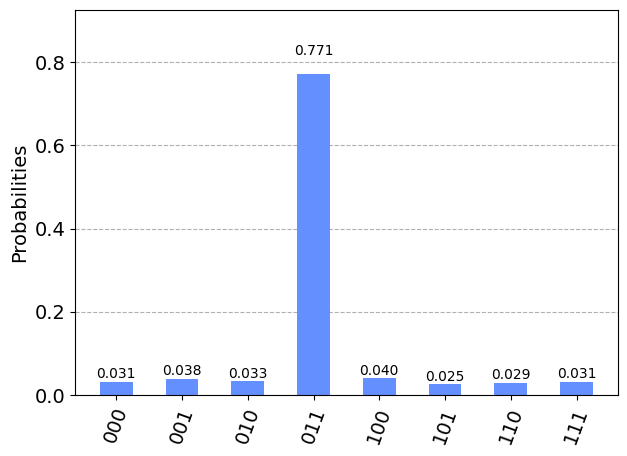

In [319]:
#Grover's Alg
ans = []
def Gr_algorithm_test(n,iterations):
    grov_ckt = QuantumCircuit(n+1,n)
    #prepare superposition state
    for i in range(n):
        grov_ckt.h(i)
    grov_ckt.x(n)
    grov_ckt.h(n)
    
    for m in range(iterations):
        bitflip_oracle = Bitflip_oracle(n)
        grov_ckt.append(bitflip_oracle,range(n+1))

        meaninv_gate = Meaninv_gate(n) 
        grov_ckt.append(meaninv_gate,range(n))
        
        if m == (iterations-1):
            for i in range(n):
                grov_ckt.measure(i,n-i-1)
            simulator = Aer.get_backend('qasm_simulator')
            job = execute(grov_ckt, simulator, shots = 1024)
            result = job.result()
            counts = result.get_counts()
            ans.append(counts) 
    return grov_ckt

for i in range(20):
    Gr_test = Gr_algorithm_test(3,i)
plot_histogram(ans[0])
#print(ans)
#Gr_test.draw()

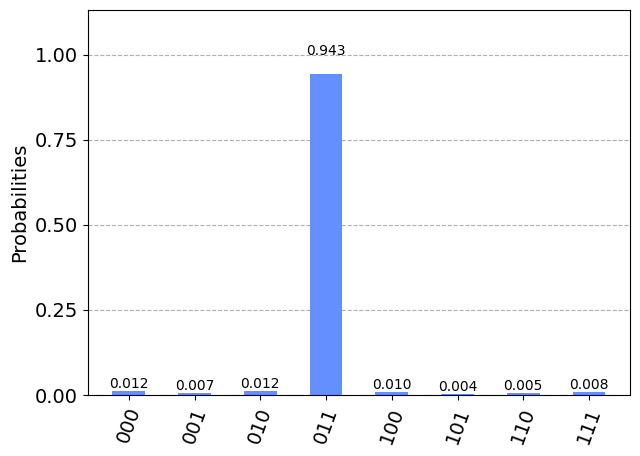

In [320]:
plot_histogram(ans[1])

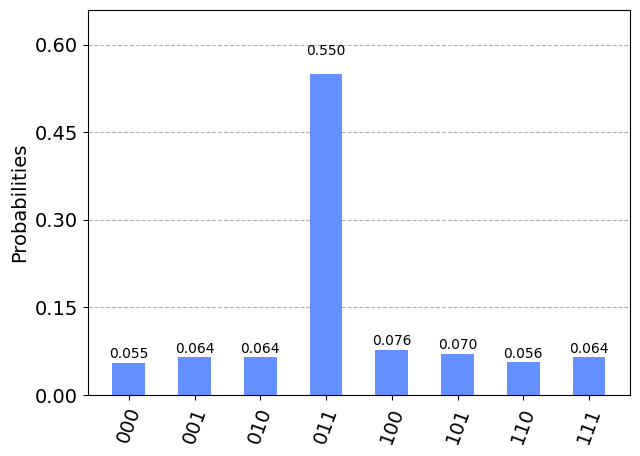

In [323]:
plot_histogram(ans[4])

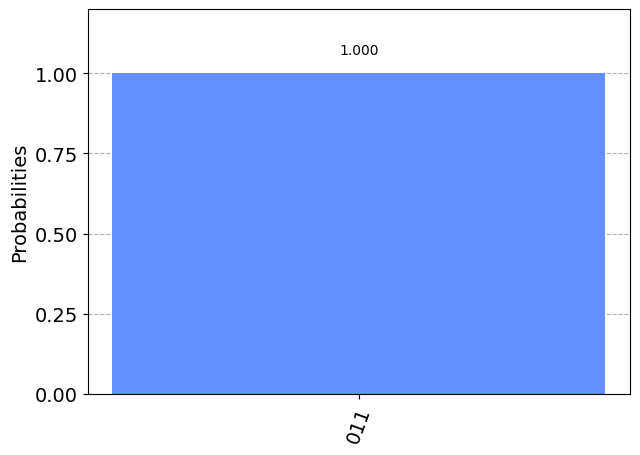

In [324]:
plot_histogram(ans[5])

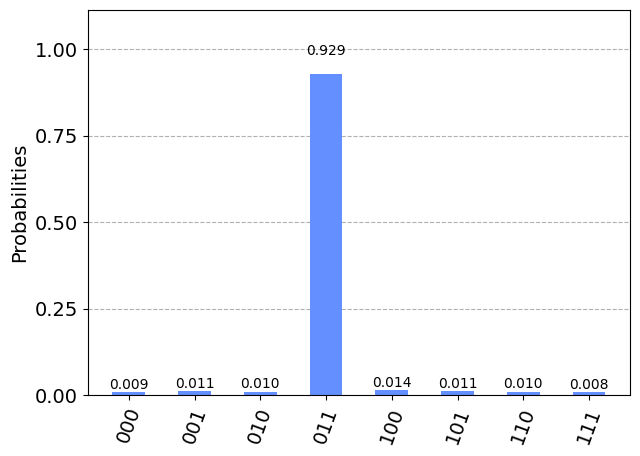

In [329]:
plot_histogram(ans[9])

### 2.d

In [331]:
#flip circuit
flip_ckt = QuantumCircuit(3)
for i in range(3):
    flip_ckt.h(i)
flip_ckt.draw()
simulator = Aer.get_backend('statevector_simulator')
job = execute(flip_ckt, simulator)
result = job.result()
statevector1 = result.get_statevector()
array_to_latex(statevector1, prefix="\\text{Statevector} = ")
#plot_bloch_multivector(statevector1)

<IPython.core.display.Latex object>

In [332]:
#flip
flip_ckt.cz(0,2)
#

flip_ckt.cz(1,2)


flip_ckt.draw()



┌───┐      
q_0: ┤ H ├─■────
     ├───┤ │    
q_1: ┤ H ├─┼──■─
     ├───┤ │  │ 
q_2: ┤ H ├─■──■─
     └───┘

In [333]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(flip_ckt, simulator)
result = job.result()
statevector2 = result.get_statevector()
array_to_latex(statevector2, prefix="\\text{Statevector} = ")
#plot_bloch_multivector(statevector2)

<IPython.core.display.Latex object>

### 2.e

In [335]:
newdj_ckt = QuantumCircuit(3,3)
newdj_ckt.append(flip_ckt,range(3))
newdj_ckt.append(meaninv_gate,range(3))
for i in range(3):
    newdj_ckt.measure(i,2-i)
newdj_ckt.draw()

┌─────────────────┐┌─────────────────┐┌─┐      
q_0: ┤0                ├┤0                ├┤M├──────
     │                 ││                 │└╥┘┌─┐   
q_1: ┤1 circuit-329077 ├┤1 circuit-259819 ├─╫─┤M├───
     │                 ││                 │ ║ └╥┘┌─┐
q_2: ┤2                ├┤2                ├─╫──╫─┤M├
     └─────────────────┘└─────────────────┘ ║  ║ └╥┘
c: 3/═══════════════════════════════════════╩══╩══╩═
                                            2  1  0

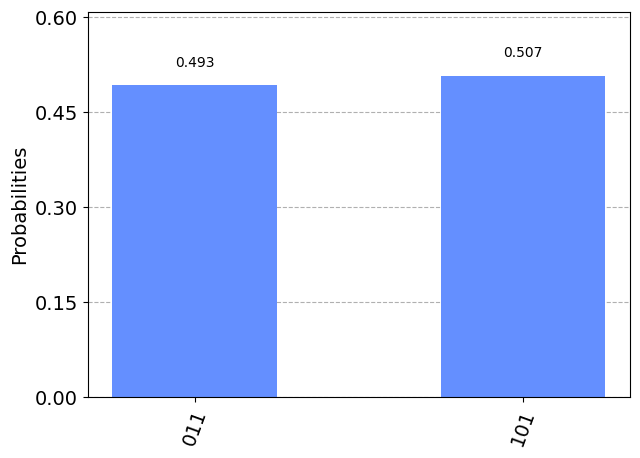

In [337]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(newdj_ckt, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### 2.f

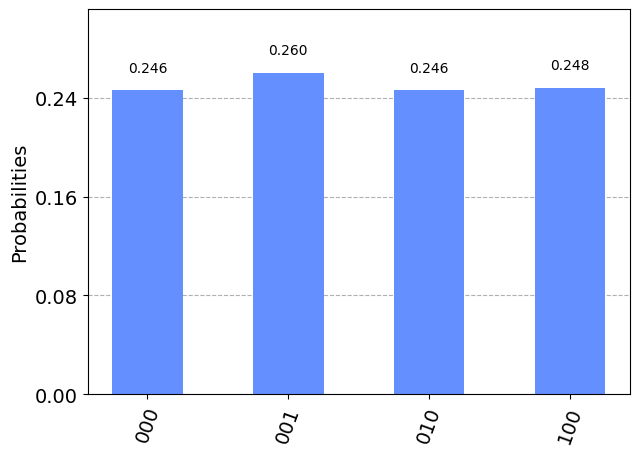

In [341]:
flip_ckt3 = QuantumCircuit(3)
flip_ckt3.cz(0,2)
#

flip_ckt3.cz(1,2)
flip_ckt3.cz(1,0)
##
dj_ckt3 = QuantumCircuit(3,3)
dj_ckt3.append(flip_ckt3,range(3))
dj_ckt3.append(meaninv_gate,range(3))
dj_ckt3.append(flip_ckt3,range(3))
dj_ckt3.append(meaninv_gate,range(3))
for i in range(3):
    dj_ckt3.measure(i,2-i)
simulator = Aer.get_backend('qasm_simulator')
job = execute(dj_ckt3, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

## Q3

In [442]:
# phi1
phi1 = QuantumCircuit(4,4)
for i in range(4):
    phi1.h(i)
phi1.rz(math.pi,0)
phi1.draw()

┌───┐┌───────┐
q_0: ┤ H ├┤ Rz(π) ├
     ├───┤└───────┘
q_1: ┤ H ├─────────
     ├───┤         
q_2: ┤ H ├─────────
     ├───┤         
q_3: ┤ H ├─────────
     └───┘         
c: 4/══════════════

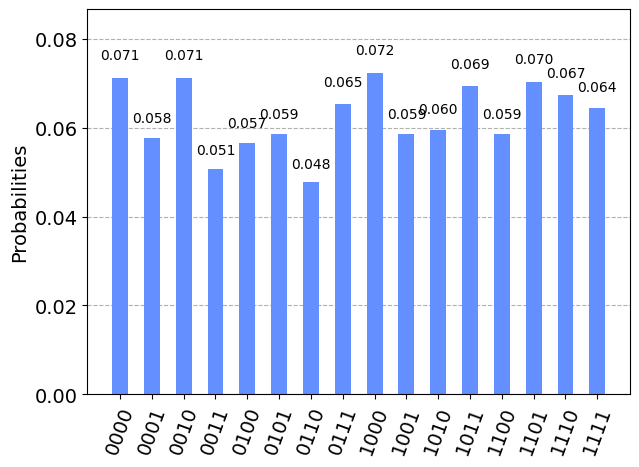

In [443]:
for i in range(4):
    phi1.measure(i,i)
simulator = Aer.get_backend('qasm_simulator')
job = execute(phi1, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

Statevector([-4.5924255e-17-0.25j,  1.5308085e-17+0.25j,
             -4.5924255e-17-0.25j,  1.5308085e-17+0.25j,
             -4.5924255e-17-0.25j,  1.5308085e-17+0.25j,
             -4.5924255e-17-0.25j,  1.5308085e-17+0.25j,
             -4.5924255e-17-0.25j,  1.5308085e-17+0.25j,
             -4.5924255e-17-0.25j,  1.5308085e-17+0.25j,
             -4.5924255e-17-0.25j,  1.5308085e-17+0.25j,
             -4.5924255e-17-0.25j,  1.5308085e-17+0.25j],
            dims=(2, 2, 2, 2))


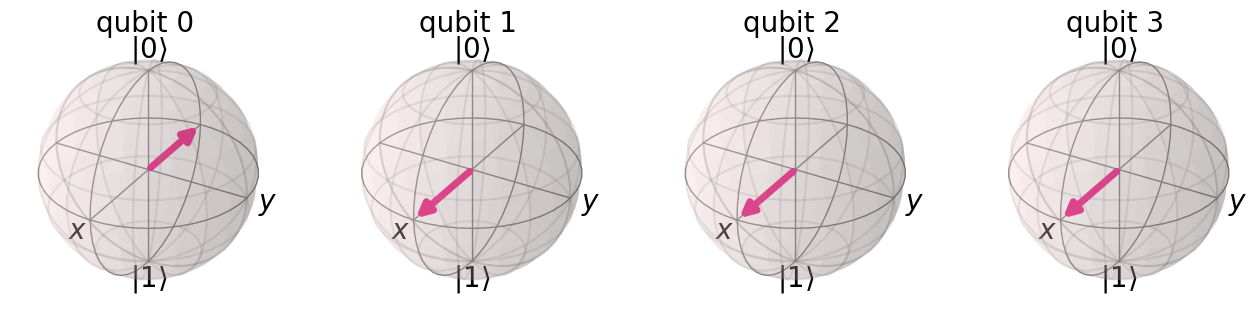

In [431]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(phi1, simulator)
result = job.result()
statevector2 = result.get_statevector()
print(statevector2)
array_to_latex(statevector2, prefix="\\text{Statevector} = ")
plot_bloch_multivector(statevector2)

In [444]:
#phi2
phi2 = QuantumCircuit(4,4)
for i in range(4):
    phi2.h(i)
phi2.rz(math.pi/2,0)
phi2.ry(math.pi,1)
phi2.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤ Rz(π/2) ├
     ├───┤└┬───────┬┘
q_1: ┤ H ├─┤ Ry(π) ├─
     ├───┤ └───────┘ 
q_2: ┤ H ├───────────
     ├───┤           
q_3: ┤ H ├───────────
     └───┘           
c: 4/════════════════

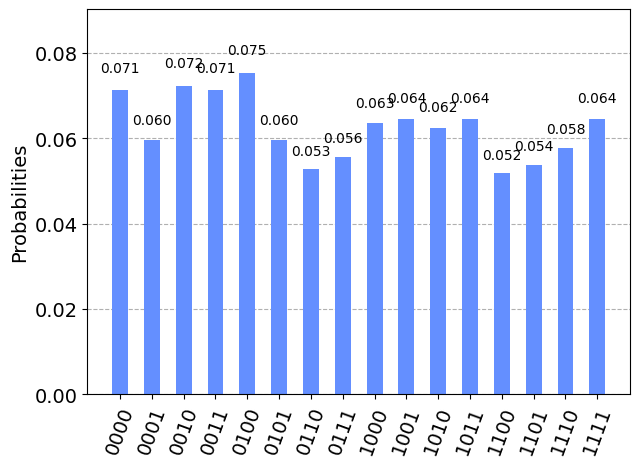

In [445]:
for i in range(4):
    phi2.measure(i,i)
simulator = Aer.get_backend('qasm_simulator')
job = execute(phi2, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

Statevector([-0.1767767+0.1767767j, -0.1767767-0.1767767j,
              0.1767767-0.1767767j,  0.1767767+0.1767767j,
             -0.1767767+0.1767767j, -0.1767767-0.1767767j,
              0.1767767-0.1767767j,  0.1767767+0.1767767j,
             -0.1767767+0.1767767j, -0.1767767-0.1767767j,
              0.1767767-0.1767767j,  0.1767767+0.1767767j,
             -0.1767767+0.1767767j, -0.1767767-0.1767767j,
              0.1767767-0.1767767j,  0.1767767+0.1767767j],
            dims=(2, 2, 2, 2))


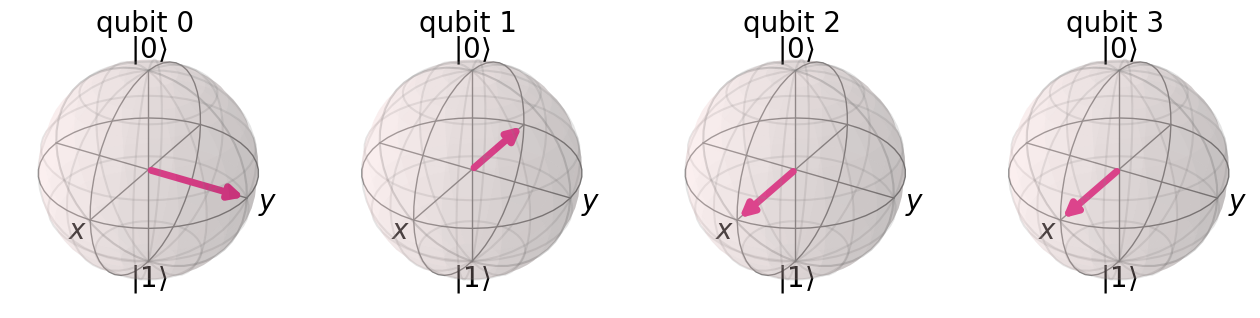

In [433]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(phi2, simulator)
result = job.result()
statevector2 = result.get_statevector()
print(statevector2)
array_to_latex(statevector2, prefix="\\text{Statevector} = ")
plot_bloch_multivector(statevector2)

In [446]:
phi3 = QuantumCircuit(4,4)
for i in range(4):
    phi3.h(i)
phi3.rz(math.pi/4,0)
phi3.rz(math.pi/2,1)
phi3.rz(math.pi,2)
phi3.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤ Rz(π/4) ├
     ├───┤├─────────┤
q_1: ┤ H ├┤ Rz(π/2) ├
     ├───┤└┬───────┬┘
q_2: ┤ H ├─┤ Rz(π) ├─
     ├───┤ └───────┘ 
q_3: ┤ H ├───────────
     └───┘           
c: 4/════════════════

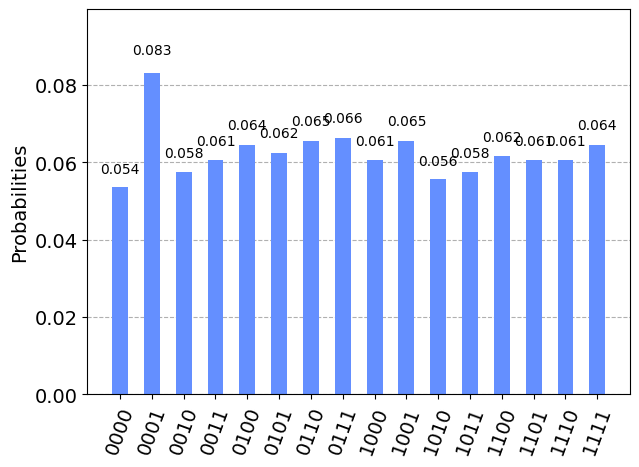

In [447]:
for i in range(4):
    phi3.measure(i,i)
simulator = Aer.get_backend('qasm_simulator')
job = execute(phi3, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

Statevector([-0.23096988-0.09567086j, -0.09567086-0.23096988j,
              0.09567086-0.23096988j,  0.23096988-0.09567086j,
              0.23096988+0.09567086j,  0.09567086+0.23096988j,
             -0.09567086+0.23096988j, -0.23096988+0.09567086j,
             -0.23096988-0.09567086j, -0.09567086-0.23096988j,
              0.09567086-0.23096988j,  0.23096988-0.09567086j,
              0.23096988+0.09567086j,  0.09567086+0.23096988j,
             -0.09567086+0.23096988j, -0.23096988+0.09567086j],
            dims=(2, 2, 2, 2))


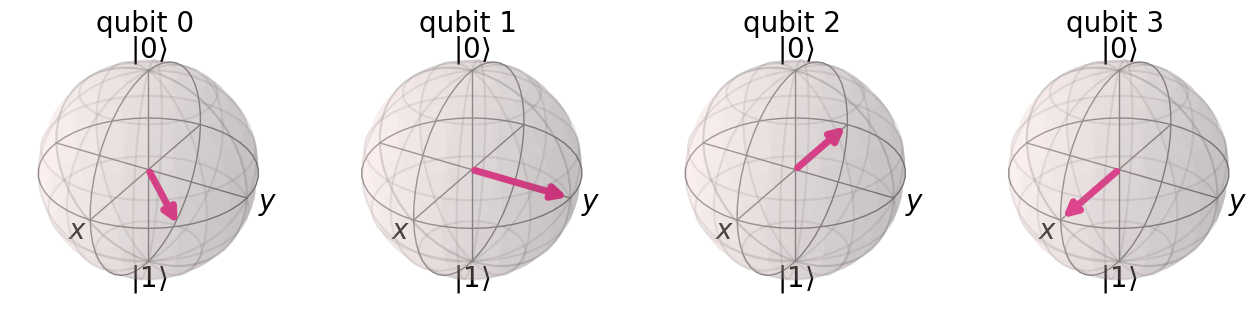

In [435]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(phi3, simulator)
result = job.result()
statevector2 = result.get_statevector()
print(statevector2)
array_to_latex(statevector2, prefix="\\text{Statevector} = ")
plot_bloch_multivector(statevector2)

In [436]:
def qft(n):
    """n-qubit QFT the first n qubits in circuit"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps! 
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1) 
    for j in range(n):
        for m in range(j): 
            qc.cu1(np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT"
    return qc

In [437]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

Statevector([-5.20993851e-32-8.86511593e-17j,
              1.27460577e-17+1.71745529e-17j,
              1.06104253e-17+1.42313037e-18j,
              2.76876681e-18+1.56622770e-17j,
              4.68750097e-17+6.98684814e-17j,
              8.51713474e-18+2.29142825e-17j,
              1.56836935e-17+2.05425645e-17j,
              1.84944257e-17+5.63313445e-17j,
             -3.67394040e-16-1.00000000e+00j,
             -3.18634068e-18-2.06275958e-17j,
              1.49324765e-17-5.33714083e-17j,
              6.79095025e-18+4.11430738e-21j,
              1.43573302e-17+8.63614149e-18j,
              1.25393182e-17+5.43374159e-18j,
              2.00057447e-17-1.12585025e-17j,
              2.56202725e-18+1.41295855e-17j],
            dims=(2, 2, 2, 2))


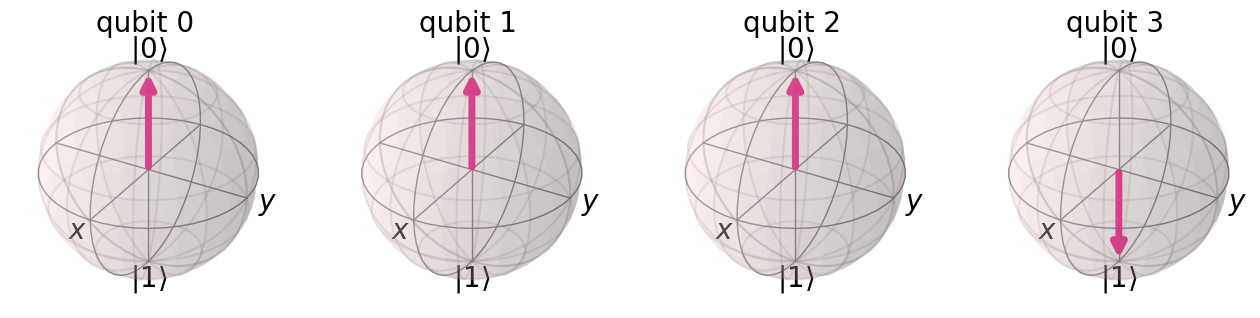

In [438]:
#phi_1
qftinv_ckt = qft_dagger(4)
phi1.append(qftinv_ckt,range(4))
simulator = Aer.get_backend('statevector_simulator')
job = execute(phi1, simulator)
result = job.result()
statevector2 = result.get_statevector()
print(statevector2)
array_to_latex(statevector2, prefix="\\text{Statevector} = ")
plot_bloch_multivector(statevector2)

Statevector([-1.10067567e-16-2.38105196e-17j,
              1.56363679e-18-1.73328695e-17j,
              1.81371229e-18-4.02636843e-17j,
              2.71015685e-17-3.56659584e-17j,
             -7.07106781e-01+7.07106781e-01j,
             -3.91709948e-17+1.97309270e-17j,
             -2.54351417e-17+2.40616078e-18j,
             -1.30142479e-17+3.56159104e-18j,
              2.42878244e-17+9.04414115e-17j,
             -1.45545770e-18+4.78425958e-18j,
             -4.64560854e-17-5.23381602e-17j,
             -1.43036822e-18-3.51368325e-18j,
             -7.02363306e-17+1.90484157e-17j,
             -2.12606570e-17-1.42437264e-17j,
              2.28346560e-17-4.77651465e-17j,
             -5.59554303e-18-1.71195050e-18j],
            dims=(2, 2, 2, 2))


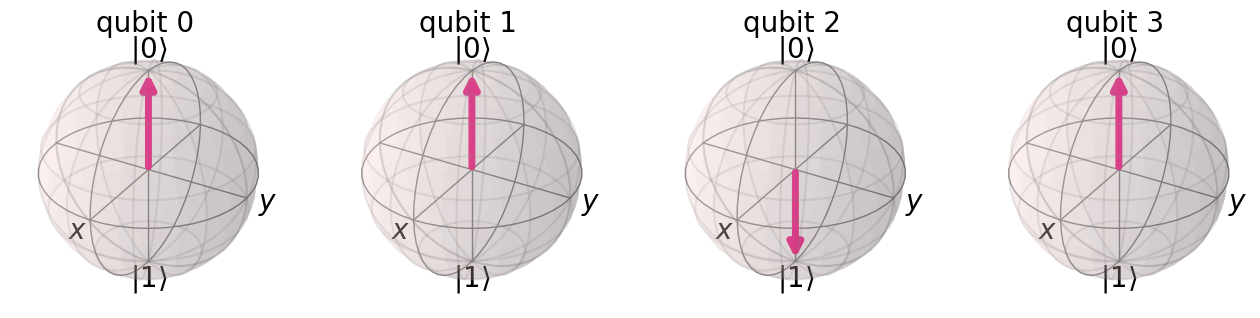

In [439]:
#phi_2
#qftinv_ckt = qft_dagger(4)
phi2.append(qftinv_ckt,range(4))
simulator = Aer.get_backend('statevector_simulator')
job = execute(phi2, simulator)
result = job.result()
statevector2 = result.get_statevector()
print(statevector2)
array_to_latex(statevector2, prefix="\\text{Statevector} = ")
plot_bloch_multivector(statevector2)

Statevector([ 3.95088218e-17-9.33659712e-17j,
              3.32129273e-17-5.39474084e-18j,
             -9.23879533e-01-3.82683432e-01j,
             -1.87634763e-17-4.76805391e-18j,
             -5.70188063e-17+9.38684238e-17j,
             -4.35144305e-18+1.44179460e-18j,
             -3.43715203e-17-3.11000635e-17j,
             -5.38861203e-18-8.72187187e-18j,
             -6.56506788e-17-3.70755215e-17j,
              3.47857408e-18-1.88512779e-17j,
              1.13291298e-16+2.46232039e-17j,
              6.24022613e-20+4.40770061e-18j,
             -4.26103068e-17+2.63917503e-17j,
             -1.23999486e-18-3.43787629e-18j,
             -2.44110877e-17-3.43715203e-17j,
              2.22358453e-17-1.38884185e-17j],
            dims=(2, 2, 2, 2))


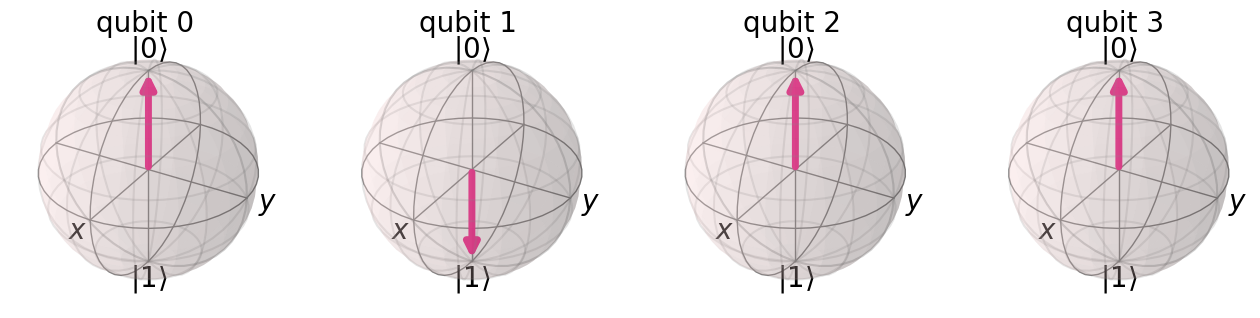

In [440]:
#phi_3
#qftinv_ckt = qft_dagger(4)
phi3.append(qftinv_ckt,range(4))
simulator = Aer.get_backend('statevector_simulator')
job = execute(phi3, simulator)
result = job.result()
statevector2 = result.get_statevector()
print(statevector2)
array_to_latex(statevector2, prefix="\\text{Statevector} = ")
plot_bloch_multivector(statevector2)

## Q4

In [380]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

In [411]:
# Create QuantumCircuit with n_count counting qubits plus 4 qubits for U to act on 
n_count = 8 # number of counting qubits
a = 7 # a variable that can be adjusted later
'''
# The first 8-qubit register for storing x
qr1 = QuantumRegister(n_count, name="q1")
# The second 4-qubit register for storing f(x) 
qr2 = QuantumRegister(4, name="q2")
cr1 = ClassicalRegister(n_count, name="c1") 
cr2 = ClassicalRegister(4, name="c2")
qc = QuantumCircuit(qr1, qr2, cr1, cr2)

# Initialize counting qubits in uniform superposition
for q in range(n_count): 
    qc.h(q)
# And ancilla register in state |1>
qc.x(3+n_count)
# Do controlled-U operations
for q in range(n_count): 
    qc.append(c_amod15(a, 2**q),[q] + [i+n_count for i in range(4)])
qc.draw()
'''
qc = QuantumCircuit(n_count + 4, n_count)

# Initialize counting qubits
# in state |+>
for q in range(n_count):
    qc.h(q)
    
# And auxiliary register in state |1>
qc.x(3+n_count)

# Do controlled-U operations
for q in range(n_count):
    qc.append(c_amod15(a, 2**q), 
             [q] + [i+n_count for i in range(4)])
qc.draw(fold = -1)

┌───┐                                                                                                                             
 q_0: ┤ H ├───────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      ├───┤       │                                                                                                                     
 q_1: ┤ H ├───────┼──────────────■──────────────────────────────────────────────────────────────────────────────────────────────────────
      ├───┤       │              │                                                                                                      
 q_2: ┤ H ├───────┼──────────────┼──────────────■───────────────────────────────────────────────────────────────────────────────────────
      ├───┤       │              │              │                                                                                       
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■────────────────────────────────────────────────────────────────────────
      ├───┤       │              │              │              │                                                                        
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────■─────────────────────────────────────────────────────────
      ├───┤       │              │              │              │              │                                                         
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────■─────────────────────────────────────────
      ├───┤       │              │              │              │              │               │                                         
 q_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────■─────────────────────────
      ├───┤       │              │              │              │              │               │               │                         
 q_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────┼────────────────■────────
      └───┘┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌───────┴───────┐
 q_8: ─────┤0            ├┤0            ├┤0            ├┤0            ├┤0             ├┤0             ├┤0             ├┤0              ├
           │             ││             ││             ││             ││              ││              ││              ││               │
 q_9: ─────┤1            ├┤1            ├┤1            ├┤1            ├┤1             ├┤1             ├┤1             ├┤1              ├
           │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 ││  7^16 mod 15 ││  7^32 mod 15 ││  7^64 mod 15 ││  7^128 mod 15 │
q_10: ─────┤2            ├┤2            ├┤2            ├┤2            ├┤2             ├┤2             ├┤2             ├┤2              ├
      ┌───┐│             ││             ││             ││             ││              ││              ││              ││               │
q_11: ┤ X ├┤3            ├┤3            ├┤3            ├┤3            ├┤3             ├┤3             ├┤3             ├┤3              ├
      └───┘└─────────────┘└─────────────┘└─────────────┘└─────────────┘└──────────────┘└──────────────┘└──────────────┘└───────────────┘
 c: 8/══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

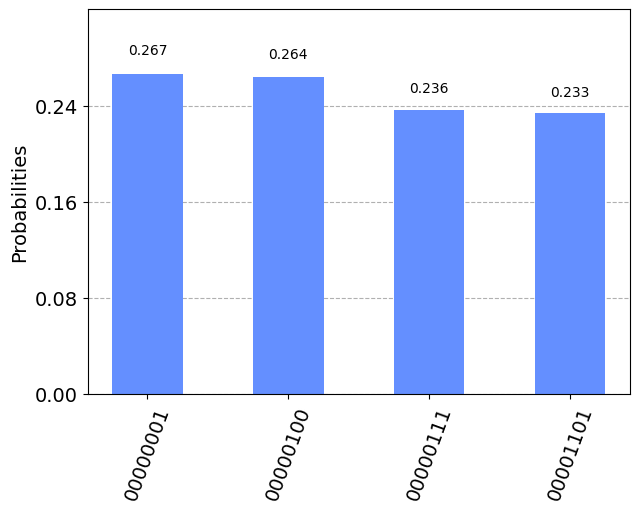

In [399]:
for i in range(8,12):
    qc.measure(i, 3-(i-8))
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [400]:
print(7**1%15)
print(7**4%15)
print(7**7%15)
print(7**13%15)

7
1
13
7


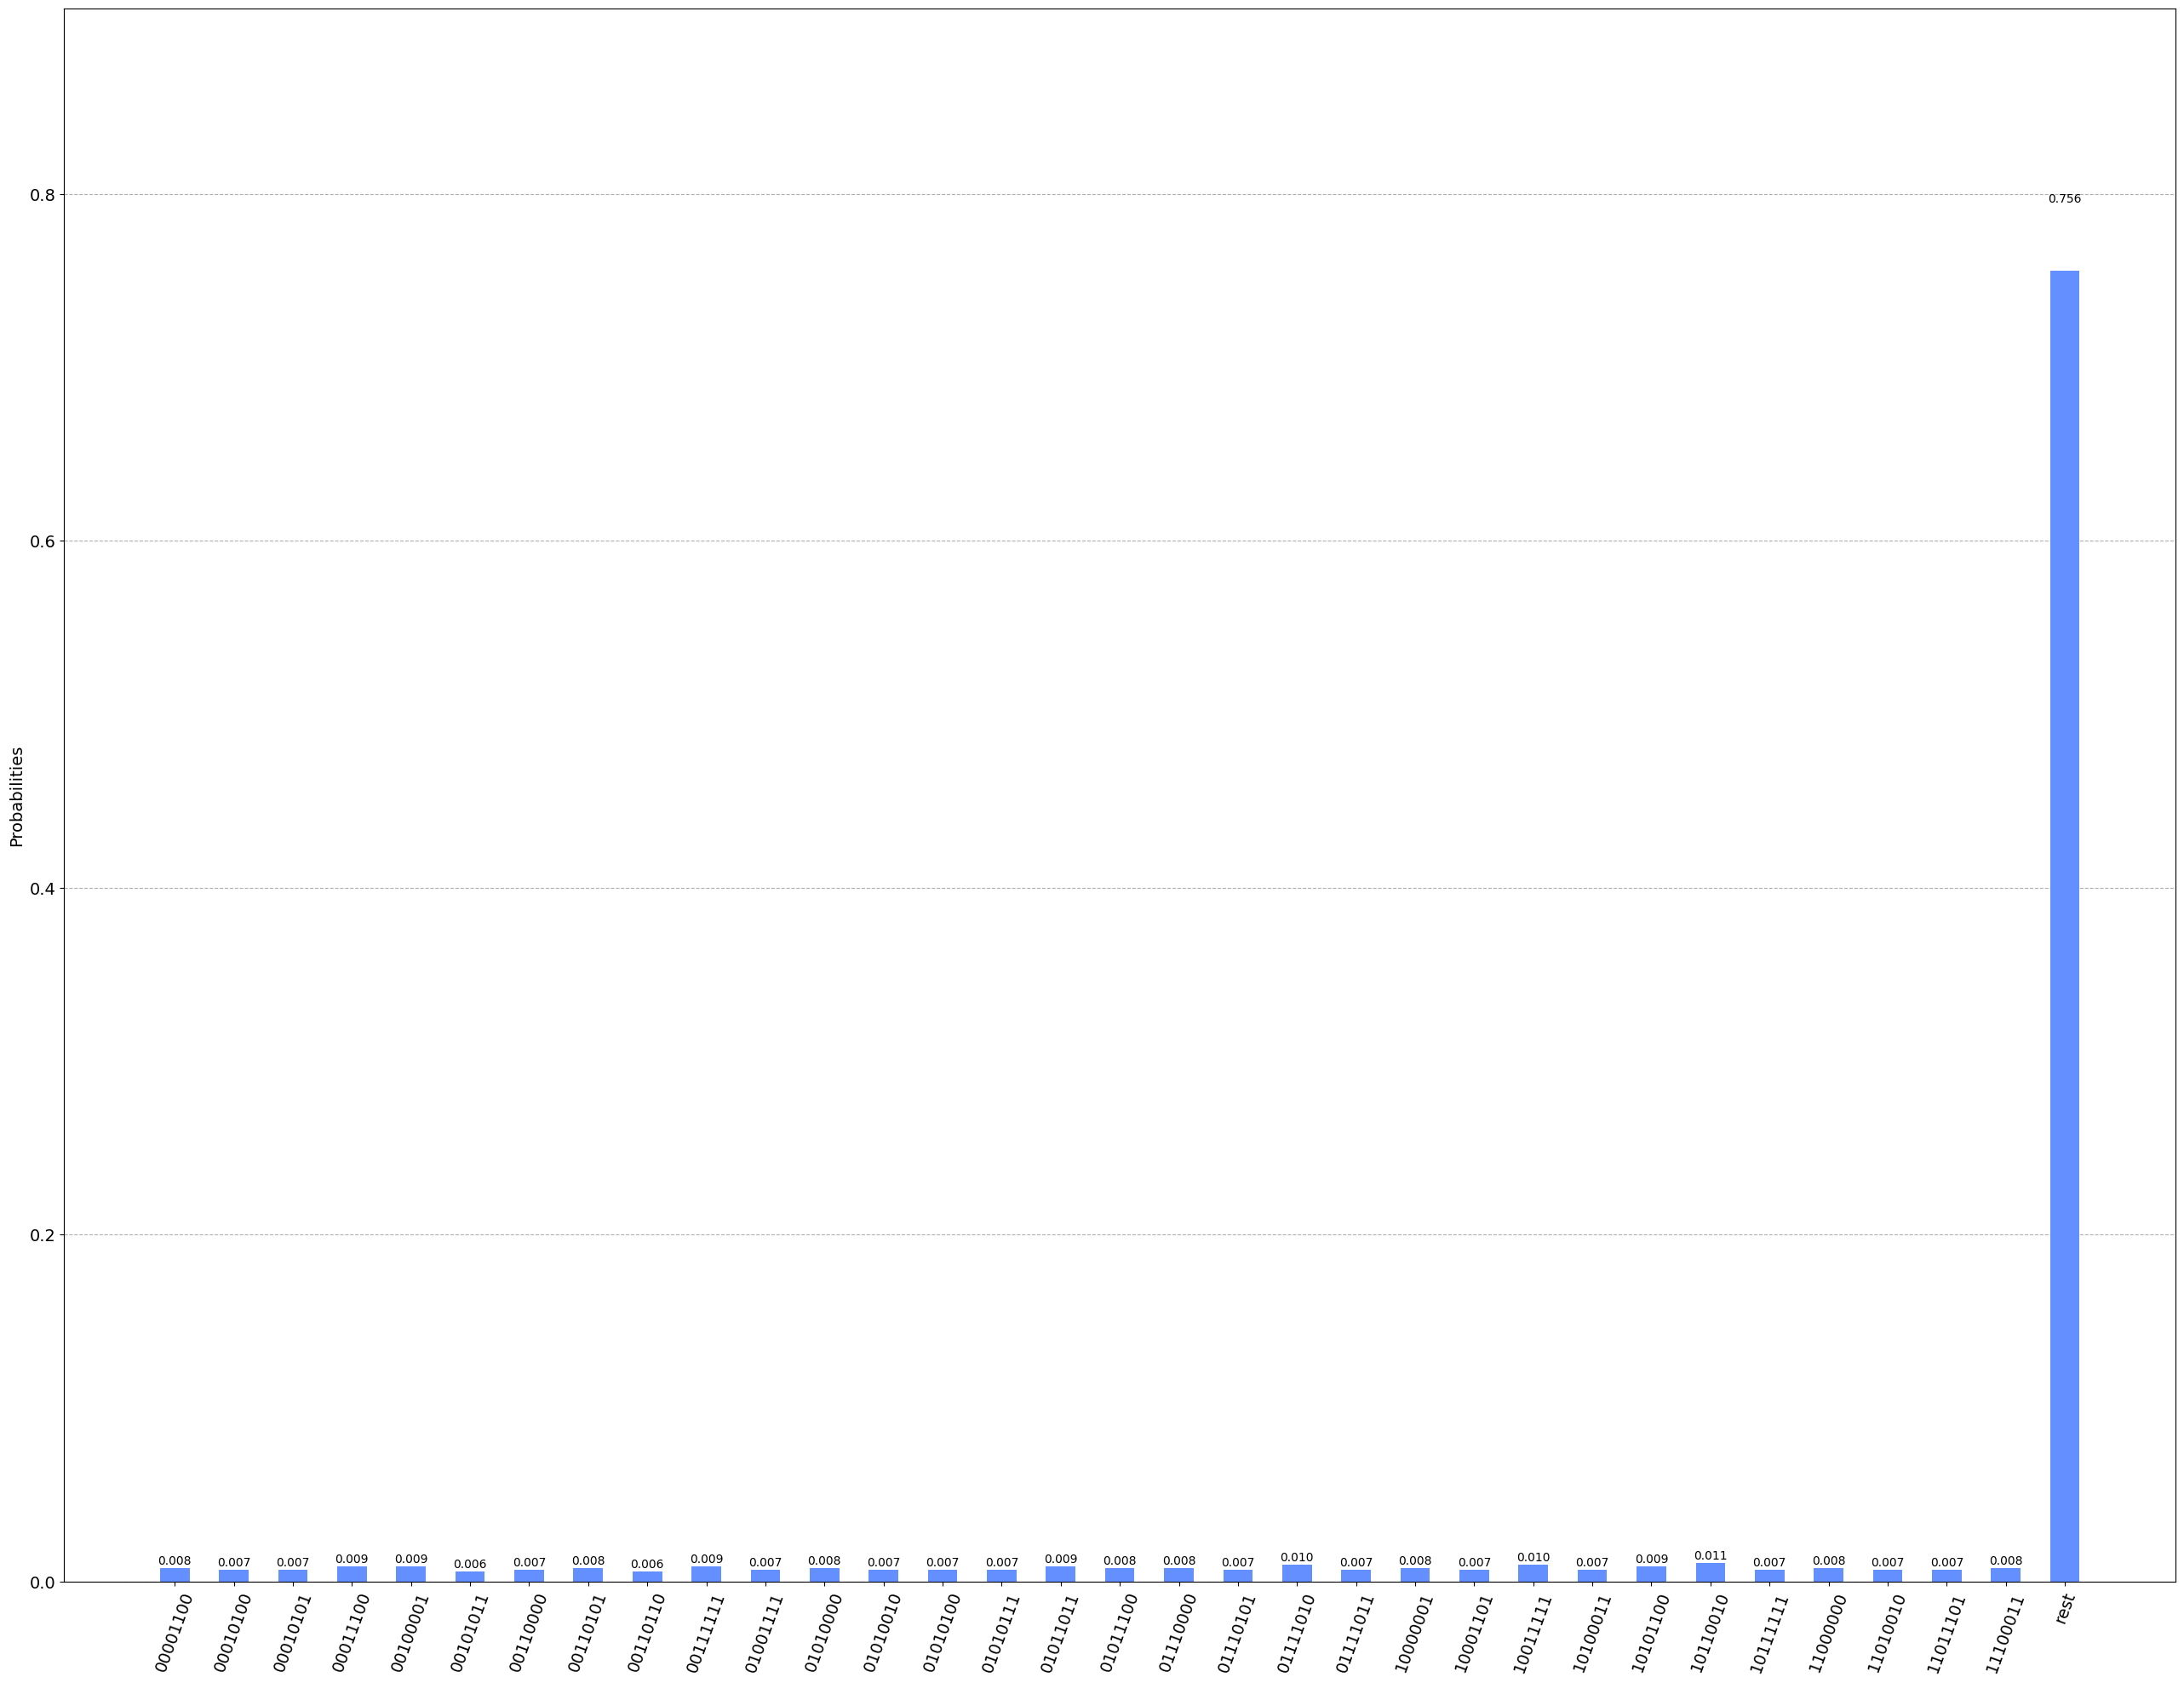

In [410]:
qc.measure(range(n_count), range(n_count))
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
#print(counts)
plot_histogram(counts,figsize=(32, 24),number_to_keep=32)

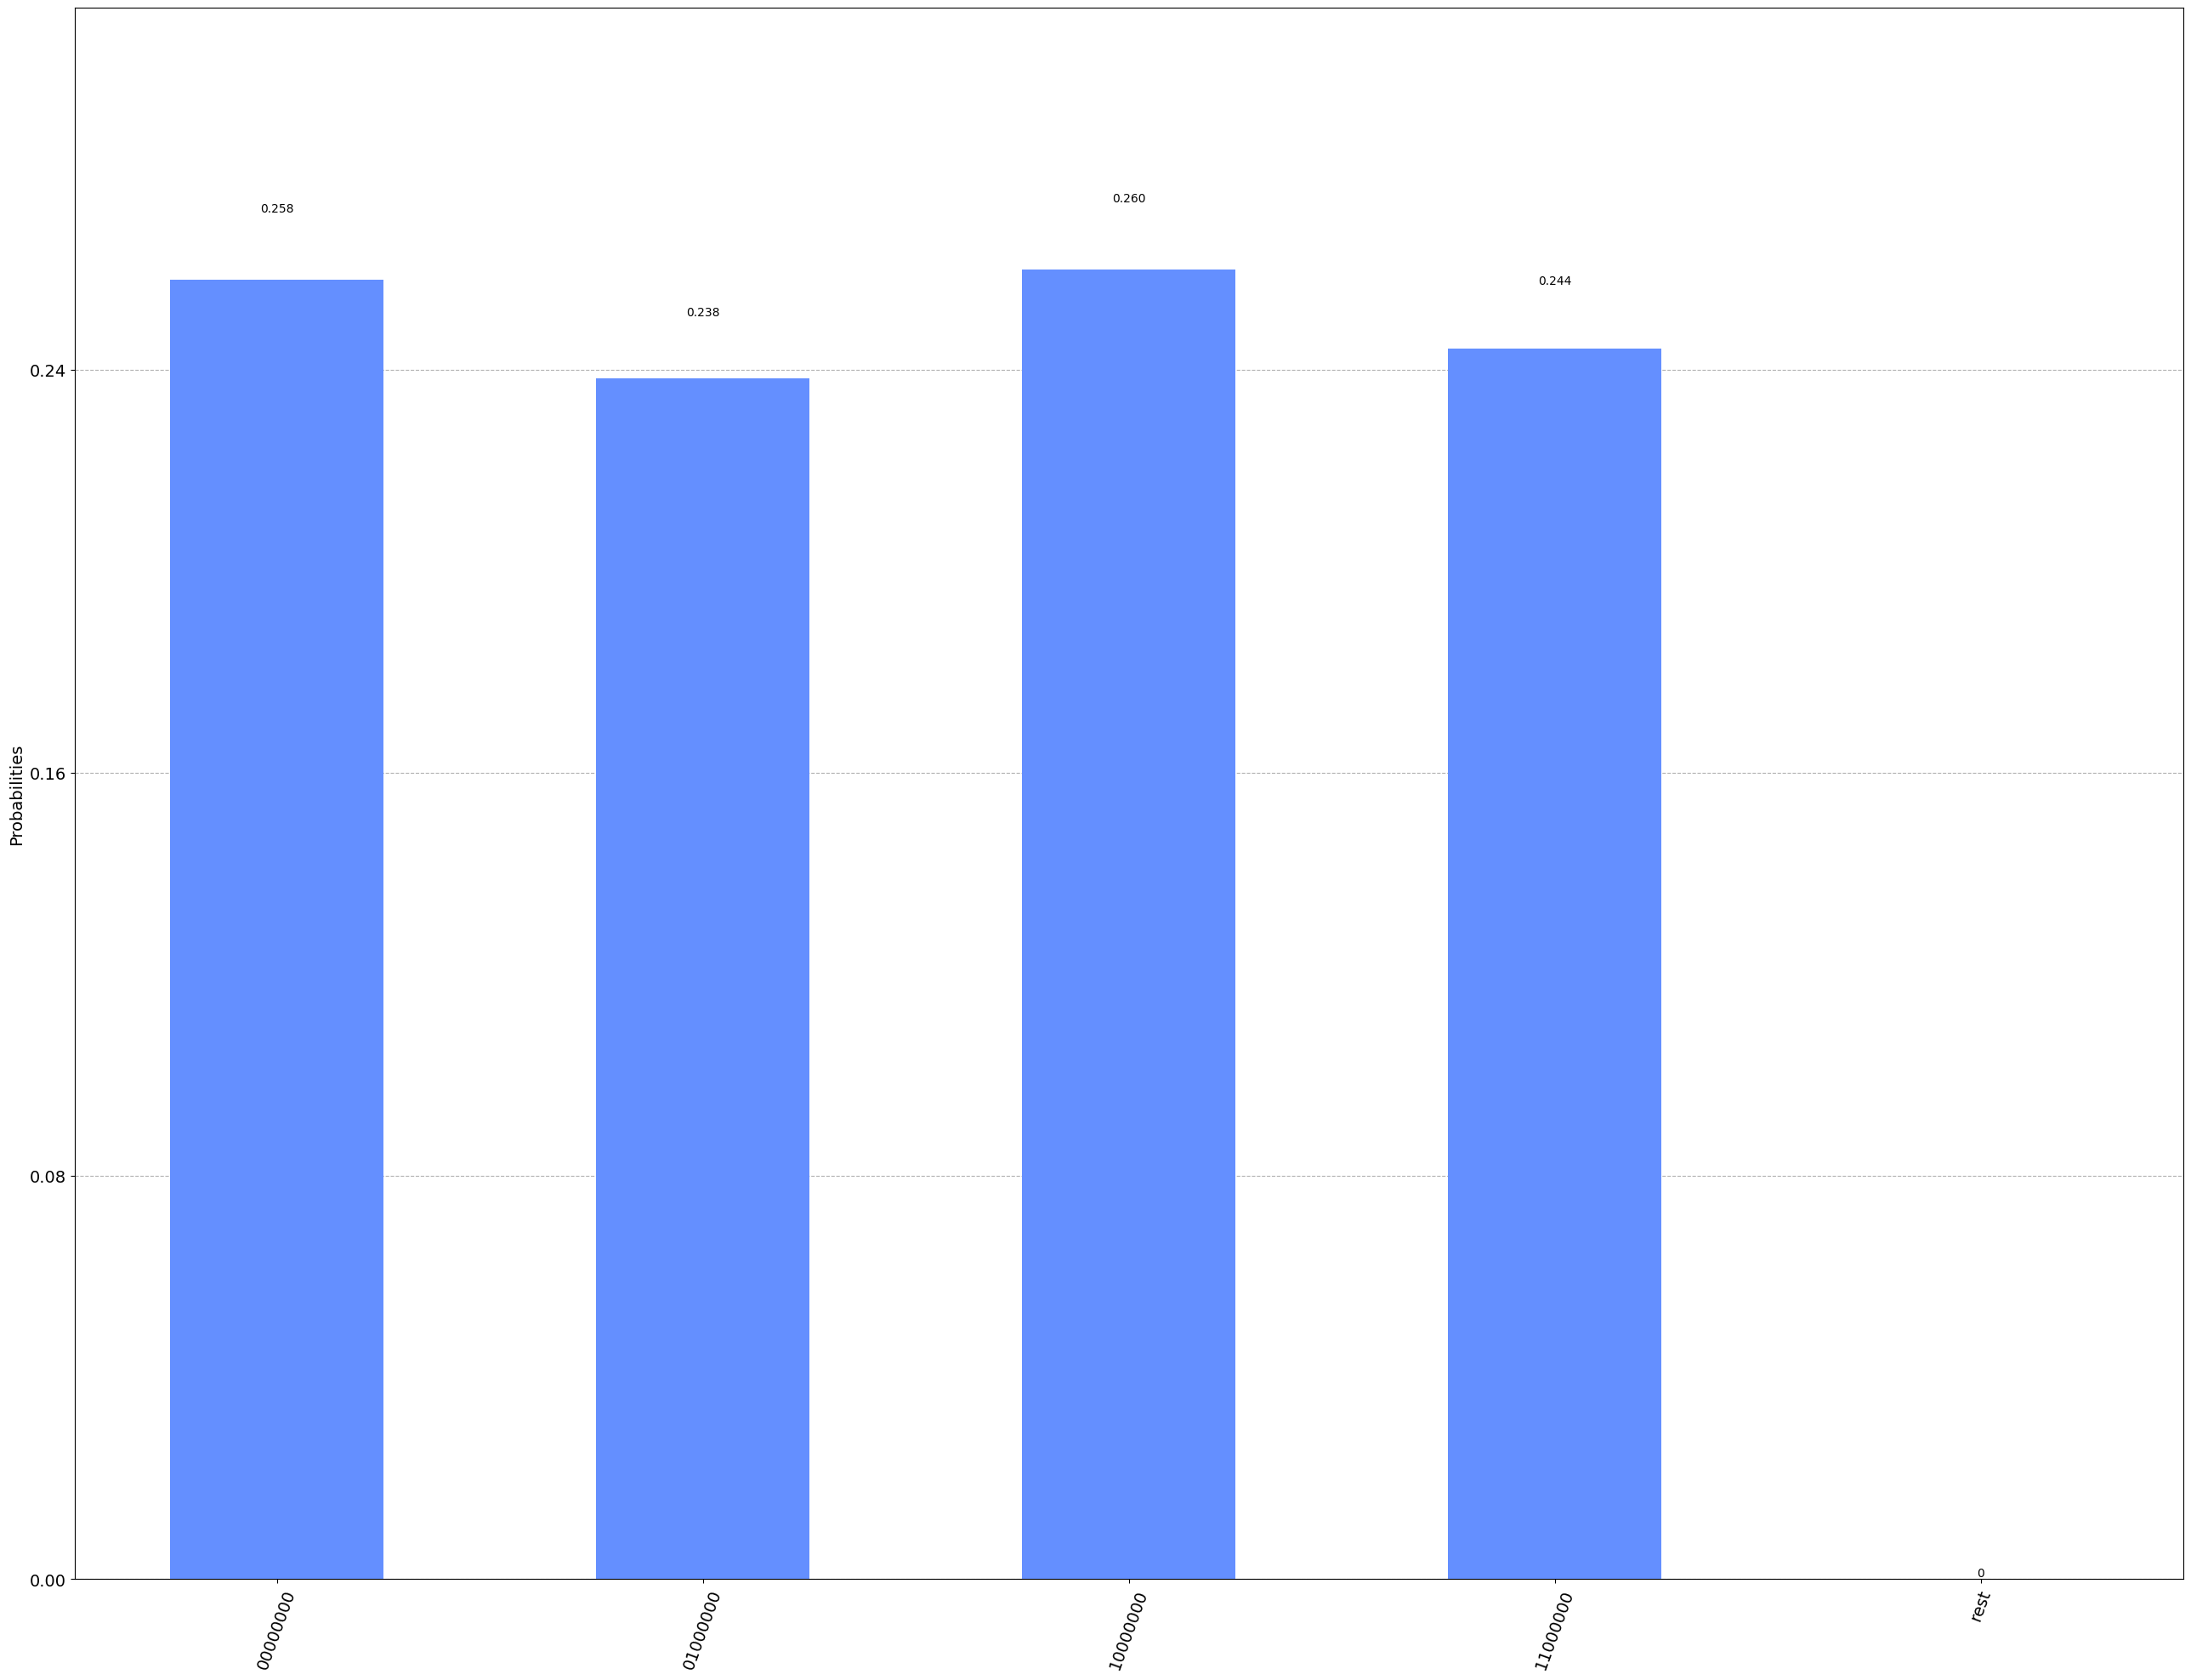

In [412]:
# Do inverse-QFT
qc.append(qft_dagger(n_count), range(n_count)) 
# Measure circuit
qc.measure(range(n_count), range(n_count))
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts,figsize=(32, 24),number_to_keep=32)

In [168]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 4.3 MB/s eta 0:00:0000:0100:01


In [413]:
import pandas as pd
from fractions import Fraction 
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2) # Convert (base 2) string to decimal 
    phase = decimal/(2**n_count) # Find corresponding eigenvalue
    measured_phases.append(phase)
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, "%i/%i" % (frac.numerator, frac.denominator), frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Phase Fraction  Guess for r
0   0.50      1/2            2
1   0.25      1/4            4
2   0.75      3/4            4
3   0.00      0/1            1
